=== 資料前五筆 ===
   isMale  isBlack  isSmoker  isDiabetic  isHypertensive  Age  Systolic  \
0       1        1         0           1               1   49       101   
1       0        0         0           1               1   69       167   
2       0        1         1           1               1   50       181   
3       1        1         1           1               0   42       145   
4       0        0         1           0               1   66       134   

   Cholesterol  HDL  Risk  
0          181   32  11.1  
1          155   59  30.1  
2          147   59  37.6  
3          166   46  13.2  
4          199   63  15.1  

=== 資料結構 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isMale          1000 non-null   int64  
 1   isBlack         1000 non-null   int64  
 2   isSmoker        1000 non-null   int64  
 3   isDiabetic      1

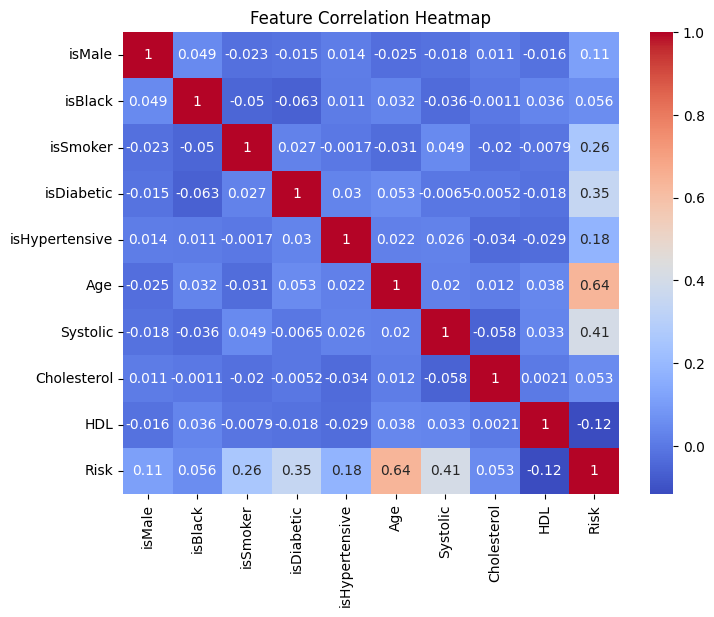

In [79]:
# 匯入基本套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料
data = pd.read_csv("heartRisk.csv")

# 顯示前幾筆資料
print("=== 資料前五筆 ===")
print(data.head())

# 資料基本資訊
print("\n=== 資料結構 ===")
print(data.info())

# 統計摘要
print("\n=== 統計描述 ===")
print(data.describe())

# 檢查缺失值
print("\n=== 缺失值檢查 ===")
print(data.isnull().sum())

# 相關性熱圖
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 選擇指定特徵
features = ['isSmoker', 'isDiabetic', 'Age', 'Systolic']
target = 'Risk'

X = data[features]
y = data[target]

# 分割訓練集與測試集（80/20）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 標準化數值特徵（Age, Systolic）
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

num_cols = ['Age', 'Systolic']
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

print("資料前處理完成。")


資料前處理完成。


In [81]:
from sklearn.linear_model import LinearRegression

# 建立多元線性回歸模型
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 模型係數
print("Intercept (截距):", model.intercept_)
coef_table = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\n=== 模型係數 ===")
print(coef_table)


Intercept (截距): 9.560531577495057

=== 模型係數 ===
      Feature  Coefficient
0    isSmoker     8.523376
1  isDiabetic    10.827491
2         Age    10.567961
3    Systolic     6.600134



=== 模型評估 ===
MSE  = 82.1681
RMSE = 9.0647
MAE  = 7.1494
R²   = 0.6952


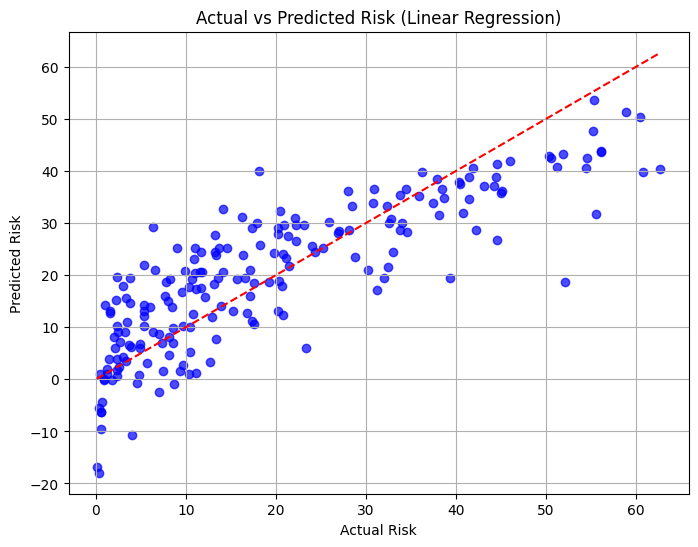

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 預測
y_pred = model.predict(X_test_scaled)


# 評估指標
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== 模型評估 ===")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAE  = {mae:.4f}")
print(f"R²   = {r2:.4f}")

# Actual vs Predicted Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Risk")
plt.ylabel("Predicted Risk")
plt.title("Actual vs Predicted Risk (Linear Regression)")
plt.grid(True)
plt.show()


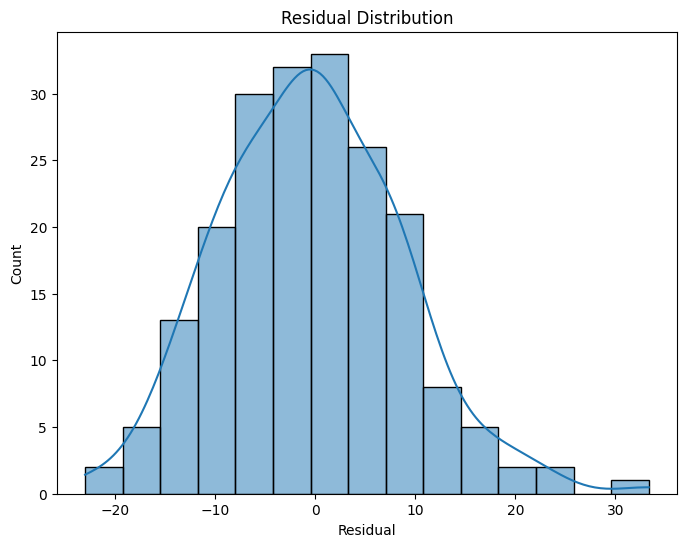

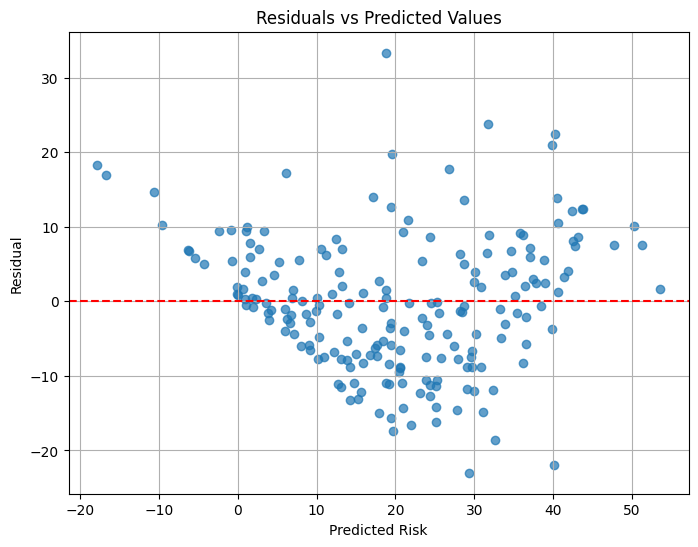

In [83]:
# 殘差計算
residuals = y_test - y_pred

# 殘差分佈圖
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=15)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.show()

# 殘差 vs 預測值
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Risk")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()
